<a href="https://colab.research.google.com/github/woodword-0/ML-Projects/blob/main/Wally_World_CorpProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from math import floor
from fbprophet import Prophet

import os 

from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(9001)
#WHAT!? 9000!?!?

Mounted at /content/gdrive


#Load Data

In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_Corporate.csv')
df=df.drop(columns=['Unnamed: 0','Weekly_Sales','Weekly_Sales_log','minMax_WeeklySales','minMax_log'])
df.describe()

,log_minMax
count,143.000000
mean,0.282736
std,0.138834
min,0.000000
25%,0.222445
50%,0.266150
75%,0.325974
max,1.000000


In [ ]:
dates=set(df['Date'])
dates=sorted(dates)

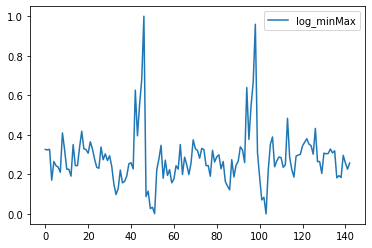

In [ ]:
df.plot()
plt.show()

#Model

##Model Prep

In [ ]:
#Prophet demands columns be designated as ds and y
df=df.rename(columns={'Date':'ds','log_minMax':'y'})

###Train, Validation, And Test Split

In [ ]:
trainInd=floor(len(df)*.8)
valInd=floor(len(df)*.9)
train=df.loc[:trainInd,:]
val=df['ds'][trainInd:valInd]
val=val.to_frame()
test=df['ds'][valInd:]
test=test.to_frame()

##Model Creation And Validation

In [ ]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast=model.predict(val)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2012-04-13  0.315585    0.213965    0.423718
1 2012-04-20  0.296908    0.183362    0.408533
2 2012-04-27  0.263411    0.153520    0.364251
3 2012-05-04  0.246405    0.143600    0.351457
4 2012-05-11  0.261774    0.160355    0.371666


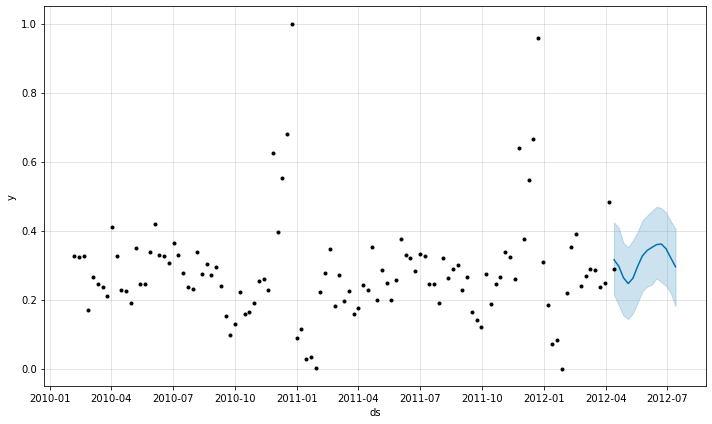

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.000000
mean,0.300075,0.207211,0.418918,0.299935,0.300200,0.013099,0.013099,0.013099,0.013099,0.013099,0.013099,0.0,0.0,0.0,0.313174
std,0.001405,0.038486,0.037801,0.001286,0.001519,0.037075,0.037075,0.037075,0.037075,0.037075,0.037075,0.0,0.0,0.0,0.037816
min,0.297892,0.143600,0.351457,0.297892,0.297892,-0.052495,-0.052495,-0.052495,-0.052495,-0.052495,-0.052495,0.0,0.0,0.0,0.246405
25%,0.298984,0.181156,0.398685,0.298950,0.299009,-0.006167,-0.006167,-0.006167,-0.006167,-0.006167,-0.006167,0.0,0.0,0.0,0.295419
50%,0.300075,0.216129,0.425436,0.299954,0.300169,0.018314,0.018314,0.018314,0.018314,0.018314,0.018314,0.0,0.0,0.0,0.318221
75%,0.301166,0.239381,0.450374,0.300935,0.301373,0.044893,0.044893,0.044893,0.044893,0.044893,0.044893,0.0,0.0,0.0,0.346144
max,0.302258,0.261378,0.468978,0.301910,0.302604,0.059869,0.059869,0.059869,0.059869,0.059869,0.059869,0.0,0.0,0.0,0.361119


In [ ]:
val_y=df['y'][trainInd:valInd]
y_hat=forecast.yhat

In [ ]:
val_y=val_y.to_numpy()
y_hat=y_hat.to_numpy()

In [ ]:
rss=((val_y-y_hat)**2).sum()
mse=np.mean((val_y-y_hat)**2)
print("Final rmse value is =",np.sqrt(np.mean((val_y-y_hat)**2)))

Final rmse value is = 0.048323339567081965


##Run Model Against Test Set

In [ ]:
forecast=model.predict(test)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2012-07-20  0.280481    0.168553    0.383817
1 2012-07-27  0.276975    0.169866    0.373978
2 2012-08-03  0.281392    0.175109    0.391920
3 2012-08-10  0.294904    0.189505    0.390900
4 2012-08-17  0.315819    0.204172    0.425579


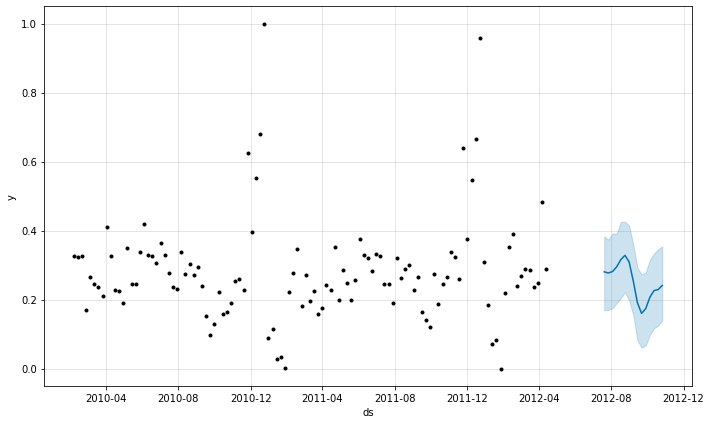

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0,15.0,15.000000
mean,0.304944,0.144537,0.357301,0.304281,0.305738,-0.053717,-0.053717,-0.053717,-0.053717,-0.053717,-0.053717,0.0,0.0,0.0,0.251227
std,0.001502,0.051470,0.050682,0.001269,0.001774,0.053736,0.053736,0.053736,0.053736,0.053736,0.053736,0.0,0.0,0.0,0.052780
min,0.302593,0.060566,0.273502,0.302270,0.302992,-0.145590,-0.145590,-0.145590,-0.145590,-0.145590,-0.145590,0.0,0.0,0.0,0.160026
25%,0.303769,0.106999,0.324608,0.303295,0.304347,-0.090251,-0.090251,-0.090251,-0.090251,-0.090251,-0.090251,0.0,0.0,0.0,0.216204
50%,0.304944,0.155619,0.360072,0.304289,0.305715,-0.050824,-0.050824,-0.050824,-0.050824,-0.050824,-0.050824,0.0,0.0,0.0,0.254120
75%,0.306119,0.182307,0.391410,0.305281,0.307124,-0.015285,-0.015285,-0.015285,-0.015285,-0.015285,-0.015285,0.0,0.0,0.0,0.288148
max,0.307295,0.221430,0.425802,0.306244,0.308543,0.023961,0.023961,0.023961,0.023961,0.023961,0.023961,0.0,0.0,0.0,0.328234


In [ ]:
test_y=df['y'][valInd:]
y_hat=forecast.yhat

In [ ]:
test_y=test_y.to_numpy()
y_hat=y_hat.to_numpy()

In [ ]:
rss=((test_y-y_hat)**2).sum()
mse=np.mean((test_y-y_hat)**2)
print("Final rmse value is =",np.sqrt(np.mean((test_y-y_hat)**2)))

Final rmse value is = 0.037670534146939584


#Pickeling the model

In [ ]:
pickle.dump(model,open(r'gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/W_Corp_Prophet.sav','wb'))